In [1]:
import pandas as pd

In [4]:
ads_data = pd.read_csv('ads_ctr.csv')
ads_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [5]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [10]:
ads_data['Daily Time Spent on Site'].values

array([62.26, 41.73, 44.4 , ..., 55.6 , 46.61, 46.61])

In [107]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

X = pd.DataFrame()

scalers = {}
for col in ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Area Income']:
    scalers[col] = StandardScaler() # MinMaxScaler() 
    X[col] = scalers[col].fit_transform(ads_data[col].values.reshape(-1, 1)).flatten()

X.head()

,Daily Time Spent on Site,Age,Daily Internet Usage,Area Income
0,0.038160,-0.459619,-0.120773,1.172282
1,-1.269204,-0.576270,0.720504,0.599579
2,-1.099176,-0.692921,-0.120773,0.302562
3,-0.113400,-0.926224,0.720504,0.175438
4,-0.792872,-0.692921,0.583557,0.036325


In [108]:
encoders = {}
for col in [ 'Gender' , 'City', 'Country']:
    encoders[col] = LabelEncoder()
    X[col] = encoders[col].fit_transform(ads_data[col])

X.head()

,Daily Time Spent on Site,Age,Daily Internet Usage,Area Income,Gender,City,Country
0,0.038160,-0.459619,-0.120773,1.172282,1,234,174
1,-1.269204,-0.576270,0.720504,0.599579,1,460,166
2,-1.099176,-0.692921,-0.120773,0.302562,0,379,71
3,-0.113400,-0.926224,0.720504,0.175438,0,269,205
4,-0.792872,-0.692921,0.583557,0.036325,0,495,149


In [109]:
ads_data['Timestamp'] = pd.to_datetime(ads_data['Timestamp'])
X['Month'] = ads_data['Timestamp'].dt.month
X['Day'] = ads_data['Timestamp'].dt.day
X['Hour'] = ads_data['Timestamp'].dt.hour

X.head()

,Daily Time Spent on Site,Age,Daily Internet Usage,Area Income,Gender,City,Country,Month,Day,Hour
0,0.038160,-0.459619,-0.120773,1.172282,1,234,174,6,9,21
1,-1.269204,-0.576270,0.720504,0.599579,1,460,166,1,16,17
2,-1.099176,-0.692921,-0.120773,0.302562,0,379,71,6,29,10
3,-0.113400,-0.926224,0.720504,0.175438,0,269,205,6,21,14
4,-0.792872,-0.692921,0.583557,0.036325,0,495,149,7,21,10


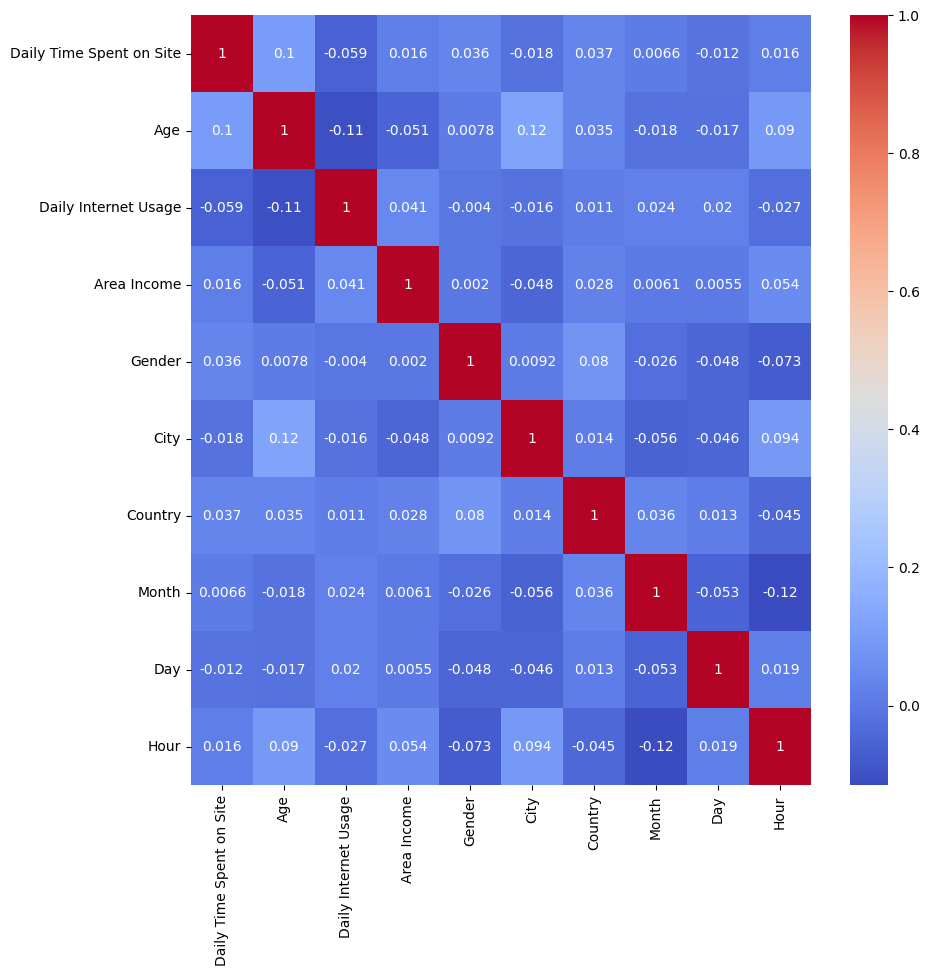

In [136]:

pair_wise_correlation = X.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(pair_wise_correlation, annot=True, cmap='coolwarm')
plt.show()

In [110]:
Y = ads_data['Clicked on Ad']

In [111]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

# prit sizes of train and test datasets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def print_metrics(model):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    cr = classification_report(y_test, y_pred)
    print(f"Classification Report: \n{cr}")



In [127]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=random_state, max_iter=400)
sgd_classifier.fit(x_train, y_train)

print_metrics(sgd_classifier)

Accuracy: 0.637
Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.94      0.73      1014
           1       0.85      0.32      0.47       986

    accuracy                           0.64      2000
   macro avg       0.72      0.63      0.60      2000
weighted avg       0.72      0.64      0.60      2000



In [128]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=random_state, max_iter=400)
logistic_regression.fit(x_train, y_train)

print_metrics(logistic_regression)

Accuracy: 0.7465
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1014
           1       0.77      0.69      0.73       986

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



/opt/homebrew/Caskroom/miniconda/base/envs/interview_prep/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
from sklearn.tree import DecisionTreeClassifier
random_forest = DecisionTreeClassifier(random_state=random_state, max_depth=7)
random_forest.fit(x_train, y_train)

print_metrics(random_forest)

Accuracy: 0.7685
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1014
           1       0.80      0.70      0.75       986

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



In [130]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=random_state)
random_forest.fit(x_train, y_train)

print_metrics(random_forest)

Accuracy: 0.8435
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1014
           1       0.86      0.82      0.84       986

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=random_state)
gradient_boosting.fit(x_train, y_train)

print_metrics(gradient_boosting)

Accuracy: 0.817
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1014
           1       0.84      0.77      0.81       986

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [135]:
import xgboost as xgb

xgboost = xgb.XGBClassifier(random_state=random_state, n_estimators=200)
xgboost.fit(x_train, y_train)

print_metrics(xgboost)

Accuracy: 0.873
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1014
           1       0.87      0.87      0.87       986

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

